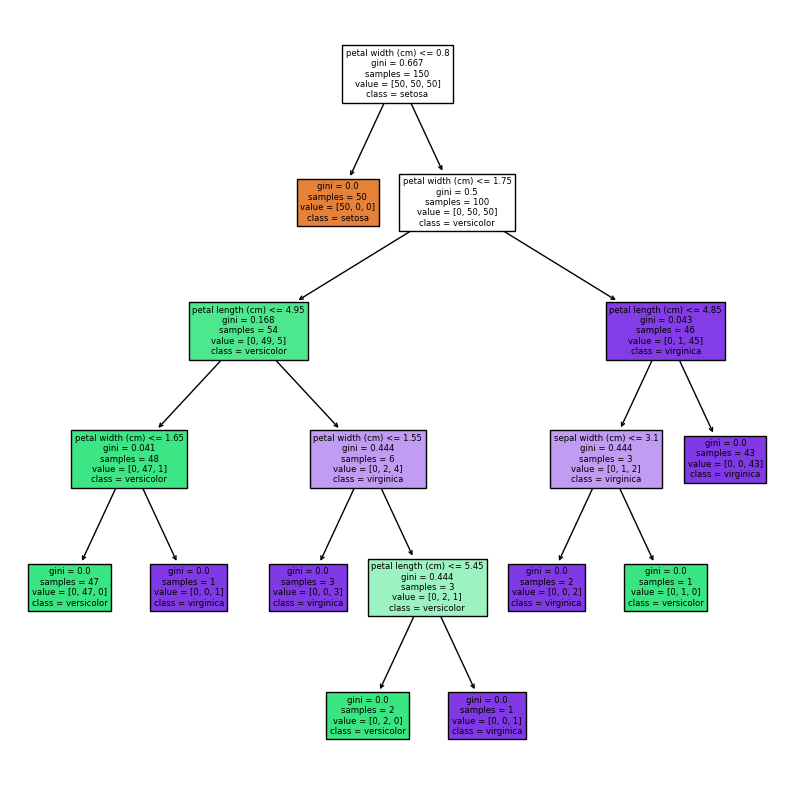

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset as an example
#df=pd.read_csv('data/clean_data.csv')
df = load_iris()
x = df.data
y = df.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x, y)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=df.feature_names, class_names=df.target_names, filled=True, ax=ax)

# Show the plot
plt.show()



In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('data/clean_data.csv')

# Select relevant features
features = ['Size', 'Type of ownership', 'Industry', 'Sector', 'State']

# Remove rows with missing values in the target or features
data = data[['Avg_Salary'] + features].dropna()

# Split the data into features (X) and target variable (y)
X = data[features]
y = data['Avg_Salary']

# Encode categorical columns using one-hot encoding
categorical_features = ['Size', 'Type of ownership', 'Industry', 'Sector', 'State']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))
X = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create the decision tree regressor
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 689418423.6238283


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('data/clean_data.csv')

# Select relevant features
numerical_features = ['Rating', 'Founded', 'Revenue']

# Remove rows with missing values in the target or features
data = data[['Avg_Salary'] + numerical_features].dropna()

# Split the data into features (X) and target variable (y)
X = data[numerical_features]
y = data['Avg_Salary']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the decision tree regressor
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 875095330.7208059


Mean Squared Error: 928434028.2130387


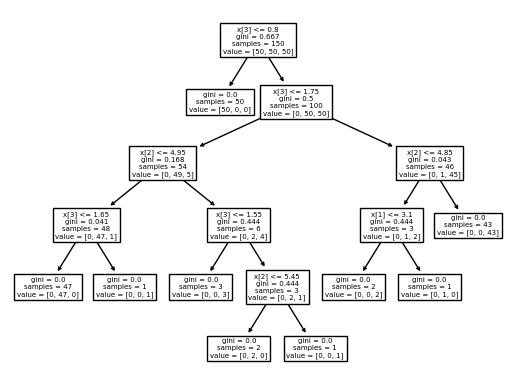

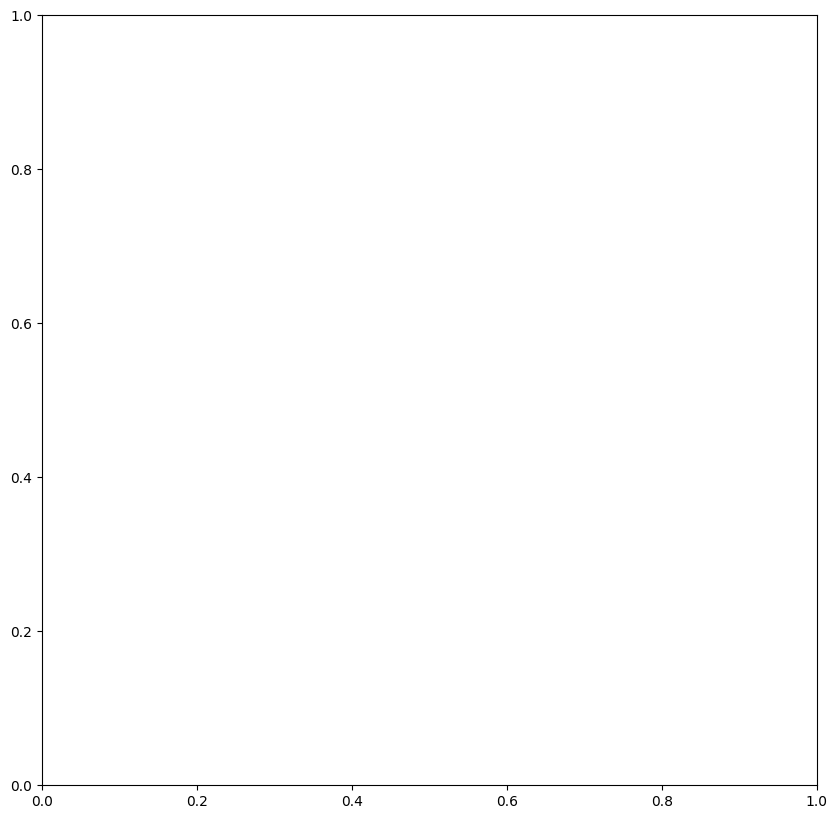

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/clean_data.csv')

# Select relevant features
numerical_features = ['Rating', 'Founded', 'Revenue']
categorical_features = ['Size', 'Type of ownership', 'Sector', 'State']

# Remove rows with missing values in the target or features 
data = data[['Avg_Salary'] + numerical_features + categorical_features].dropna()

# Split the data into features (X) and target variable (y)
X = data[numerical_features + categorical_features]
y = data['Avg_Salary']

# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree regressor with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor()) 
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
# Show the plot
plt.show()